In [13]:
# Souce-  https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [14]:

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

### STEP 1:  load data

In [15]:
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [17]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [19]:
Y[0]

'Iris-setosa'

In [20]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [21]:
dummy_y[0]

array([1., 0., 0.])

In [40]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,dummy_y,test_size = 0.1, random_state = 0)

In [41]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((135, 4), (15, 4), (135, 3), (15, 3))

### STEP 2: define model

In [42]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 4))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 3, activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

D:\Anaconda\envs\tf_1.14\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=6, kernel_initializer="he_uniform")`
  """
D:\Anaconda\envs\tf_1.14\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  
D:\Anaconda\envs\tf_1.14\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3)`
  # Remove the CWD from sys.path while we load stuff.


In [43]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


### STEP 3: Train model

In [44]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X, dummy_y,validation_split=0.20, batch_size = 10, nb_epoch =15)


D:\Anaconda\envs\tf_1.14\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 120 samples, validate on 30 samples
Epoch 1/15
120/120 [==============================] - 0s - loss: 1.1862 - acc: 0.3806 - val_loss: 0.8130 - val_acc: 0.3333
Epoch 2/15
120/120 [==============================] - 0s - loss: 1.0812 - acc: 0.4306 - val_loss: 0.7309 - val_acc: 0.3333
Epoch 3/15
120/120 [==============================] - 0s - loss: 0.9958 - acc: 0.5194 - val_loss: 0.7086 - val_acc: 0.3333
Epoch 4/15
120/120 [==============================] - 0s - loss: 0.9222 - acc: 0.5611 - val_loss: 0.6774 - val_acc: 0.3333
Epoch 5/15
120/120 [==============================] - 0s - loss: 0.8602 - acc: 0.6056 - val_loss: 0.6555 - val_acc: 0.3333
Epoch 6/15
120/120 [==============================] - 0s - loss: 0.8114 - acc: 0.6389 - val_loss: 0.6232 - val_acc: 0.3556
Epoch 7/15
120/120 [==============================] - 0s - loss: 0.7674 - acc: 0.6583 - val_loss: 0.6176 - val_acc: 0.3667
Epoch 8/15
120/120 [==============================] - 0s - loss: 0.7317 - acc: 0.6694 - val_lo

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


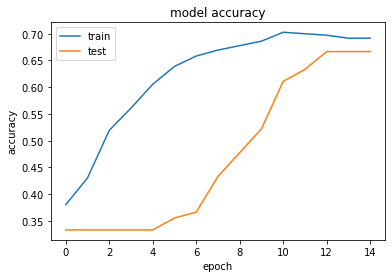

In [45]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Step4:  evaluate model

In [49]:
scores = classifier.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

15/15 [==============================] - 0s

acc: 68.89%


### Step5 : SAVING MODEL

In [64]:
print("Saving model to disk \n")
mp = "D:\\1. Machine Learning\\Practical\\DL\\Krish\\Models\\iris_model.h5"
classifier.save(mp)

Saving model to disk 



### Step6 : prediction

In [67]:
unknown = np.array([[6.1, 3.1, 5.1, 1.1]])

In [76]:
predicted = classifier.predict_classes(unknown)

1/1 [==============================] - 0s


In [77]:
predicted

array([0], dtype=int64)

In [78]:
prediction_ = np.argmax(to_categorical(predicted), axis = 1)

In [79]:
prediction_

array([0], dtype=int64)

In [80]:
prediction_ = encoder.inverse_transform(prediction_)
prediction_

array(['Iris-setosa'], dtype=object)

In [81]:
## ANOTHER PRECICTION

In [94]:
unknown = np.array([[30.1, 10.1, 20.1, 1.1]])

In [95]:
predicted = classifier.predict_classes(unknown)

1/1 [==============================] - 0s


In [96]:
predicted

array([2], dtype=int64)

In [97]:
prediction_ = np.argmax(to_categorical(predicted), axis = 1)

In [98]:
prediction_

array([2], dtype=int64)

In [99]:
prediction_ = encoder.inverse_transform(prediction_)
prediction_

array(['Iris-virginica'], dtype=object)